## Import the wrapper and instantiate it with some untrained models

In [12]:
from analysis import ModelAnalysis
from joblib import dump, load
import torch
from models import SuicideRegressorDrop
import numpy as np
np.random.seed(42)



## Train the models or load the pretrained stored models

In [13]:
# load nn model
nn_model = SuicideRegressorDrop(in_features=9)
PATH = "torch_models/bn_do_10.pickle"
saved_state_dict = torch.load(PATH).state_dict()
nn_model.load_state_dict(saved_state_dict)


<All keys matched successfully>

In [14]:
models = {
    'LinearRegression': load('models/linear/linear_default.joblib'),
    'DecisionTreeRegressor': load('models/tree/tree_md_20_ms_7.joblib'),
    # 'MLPRegressor': MLPRegressor(
    #         hidden_layer_sizes=[512, 256, 64, 8],
    #         max_iter=3000,
    #         activation='relu'),
    # 'XGBRegressor': XGBRegressor(),
    'RandomForestRegressor': load('models/forest/forest_ne_100_md_22_ms_2.joblib'),
    'NN': nn_model,
    # 'KNeighborsRegressor': KNeighborsRegressor()
}

model_analysis = ModelAnalysis(models=models)
# train the models
# model_analysis.train()

# here we just load the pretrained ones
# model_analysis.load_models()


In [15]:
# make predictions for all trained models
# the results are stored in the model_analysis class
_ = model_analysis.predict(split='train')
_ = model_analysis.predict(split='val')
_ = model_analysis.predict(split='test')


In [16]:
model_analysis.predictions['test'].keys()

dict_keys(['LinearRegression', 'DecisionTreeRegressor', 'RandomForestRegressor', 'NN'])

## Evaluate the predictions using different metrics

In [17]:
# # test other metrics
# from sklearn.metrics import (max_error, mean_absolute_error,
#                              mean_squared_error, median_absolute_error, r2_score)
# from utils import root_mean_squared_error

# for metric in [mean_squared_error, root_mean_squared_error, r2_score, mean_absolute_error]:
#     print(f"{metric.__name__:#^32}")
#     _ = model_analysis.evaluate(metric=metric, verbose=True)  # default split is test
#     _ = model_analysis.evaluate(metric=metric, split='train', verbose=True)
#     print()


## Visualizations

### Visualize the predicitons

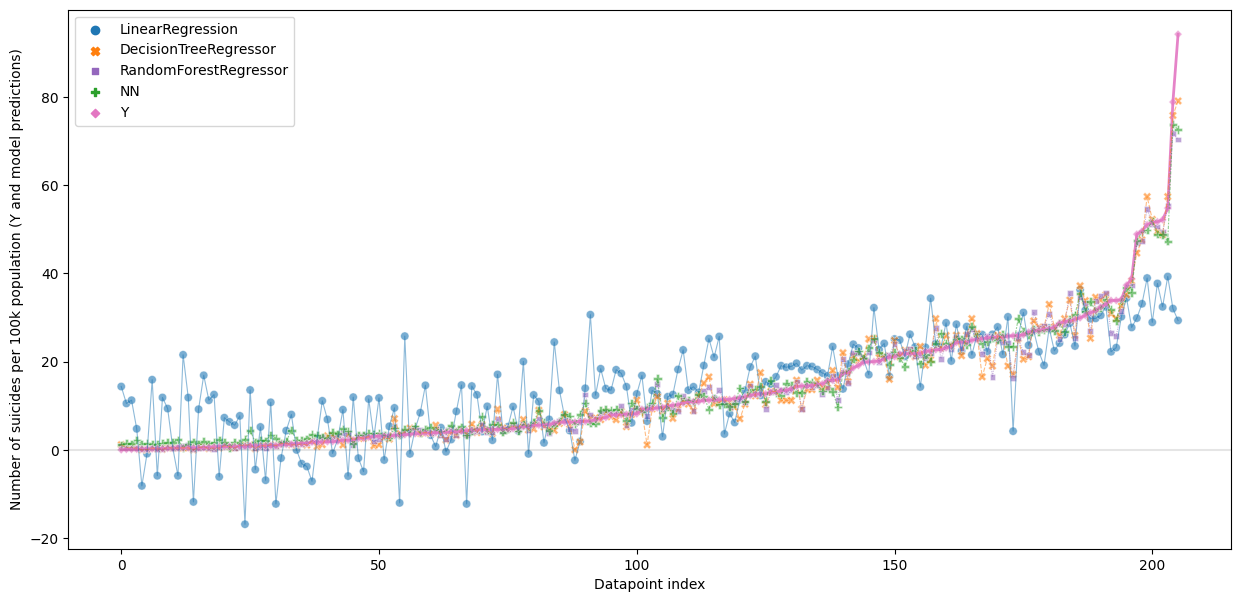

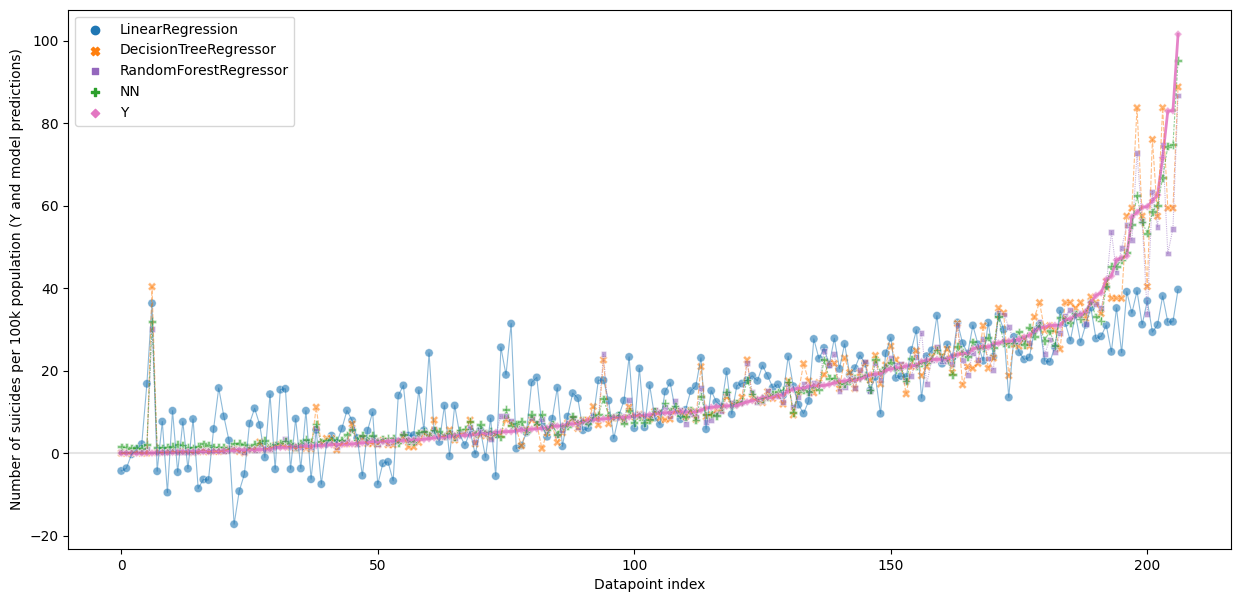

In [24]:
model_analysis.visualize_predictions(sample_range=(0,300),split="val",palette=ModelAnalysis.PALETTE, sort=True)
model_analysis.visualize_predictions(sample_range=(0,300), split='test',palette=ModelAnalysis.PALETTE, sort=True)

### Visualize the accuracies based on different metrics

In [19]:
# # testing
# import math
# import pandas as pd
# import matplotlib.pylab as plt
# import seaborn as sns
# import matplotlib.patches as mpatches


# metrics = ModelAnalysis.ALL_METRICS
# num_metrcis = len(metrics)
# ncols = 5
# nrows = math.ceil(num_metrcis / ncols)
# fig, ax = plt.subplots(figsize=(20, 5), nrows=nrows, ncols=ncols)

# for col in range(ncols):
#     for row in range(nrows):
#         index = row*ncols + col
#         if index >= num_metrcis:
#             break
#         metric = metrics[index]
#         scores, min_score = model_analysis.evaluate(
#             metric=metric, split='test')
#         df = pd.DataFrame({
#             'model': model_analysis.models.keys(),
#             'score': scores.values(),
#         })
#         cax = cax = ax[col]  # ax[row][col]
#         sns.barplot(df, x='model', y='score', ax=cax,
#                     palette=ModelAnalysis.PALETTE)
#         cax.set_title(metric.__name__, loc='left')
#         cax.set_xlabel(None)
#         cax.set_xticklabels([])

# patches = [mpatches.Patch(
#     color=model_analysis.PALETTE[m],
#     label=m)
#     for m in model_analysis.models.keys()]
# fig.legend(handles=patches)


In [20]:
# # testing
# import math
# import pandas as pd
# import matplotlib.pylab as plt
# import seaborn as sns
# import matplotlib.patches as mpatches

# split = 'test'
# sr_start, sr_end = (0,32)


# ##
# pred_keys = model_analysis.predictions[split].keys()
# all_preds = model_analysis.predictions[split].values()
# y = model_analysis.splits[split]['y']
# sorted_preds = sorted(zip(y,*all_preds))
# y_sorted, *all_preds_sorted = zip(*sorted_preds)
# print(list(zip(pred_keys,all_preds_sorted)))


# ##
# preds_subset = {k: preds
#                 for k, preds in zip(pred_keys,all_preds_sorted)}
# # map tensor to float
# preds_subset['NN'] = list(map(lambda x: x.item(), preds_subset['NN']))
# # print(preds_subset['NN'])
# preds_subset['Y'] = y_sorted

# for k, v in preds_subset.items():
#     print(k, len(v))
# pred_df = pd.DataFrame(preds_subset)

# fig, ax = plt.subplots(figsize=(15, 7))
# ax.set_xlabel('Datapoint index')
# ax.set_ylabel(
#     'Number of suicides per 100k population (Y and model predictions)')
# sns.scatterplot(pred_df, markers=True, alpha=.6,
#                 ax=ax, palette=model_analysis.PALETTE)
# sns.lineplot(pred_df.Y, alpha=.9, ax=ax,
#                 color=model_analysis.Y_COLOR, linewidth=2, legend=False)
# sns.lineplot(pred_df[[k for k in model_analysis.models.keys() if k != 'Y']],
#                 alpha=.5, ax=ax, palette=model_analysis.PALETTE, linewidth=.8, legend=False)
# ax.axhline(c='black', alpha=.1)

mean_squared_error
min: NN
                   model      score
0       LinearRegression  95.637126
1  DecisionTreeRegressor   7.622022
2  RandomForestRegressor   7.552944
3                     NN   5.525893
root_mean_squared_error
min: NN
                   model     score
0       LinearRegression  9.779424
1  DecisionTreeRegressor  2.760801
2  RandomForestRegressor  2.748262
3                     NN  2.350722
r2_score
min: NN
                   model     score
0       LinearRegression  0.533516
1  DecisionTreeRegressor  0.962822
2  RandomForestRegressor  0.963159
3                     NN  0.973047
mean_absolute_error
min: NN
                   model     score
0       LinearRegression  6.744275
1  DecisionTreeRegressor  1.761131
2  RandomForestRegressor  1.487938
3                     NN  1.433384
max_error
min: DecisionTreeRegressor
                   model      score
0       LinearRegression  64.937383
1  DecisionTreeRegressor  15.136667
2  RandomForestRegressor  23.885400
3         

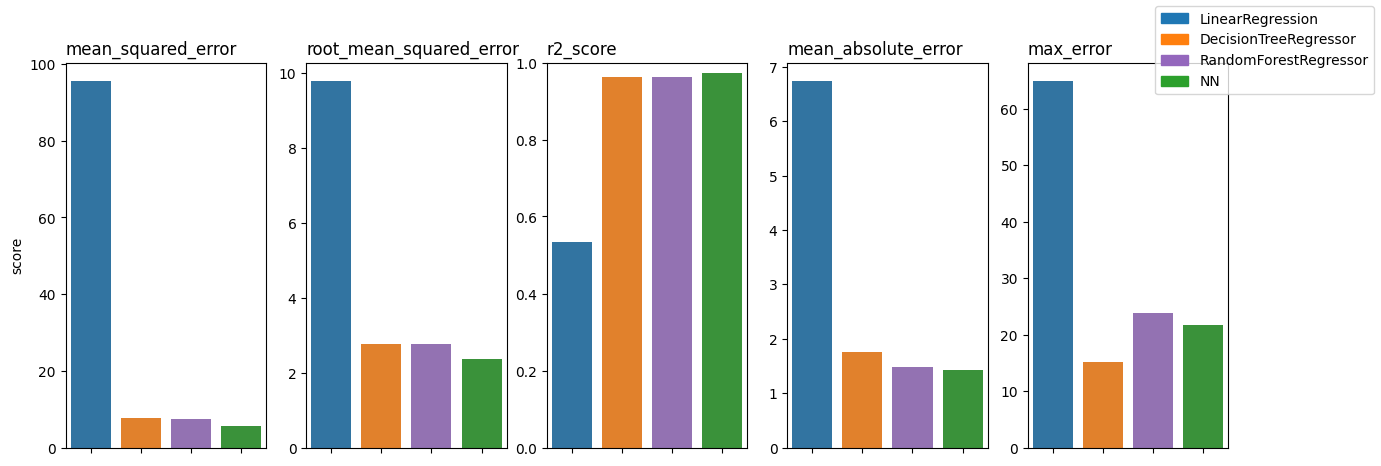

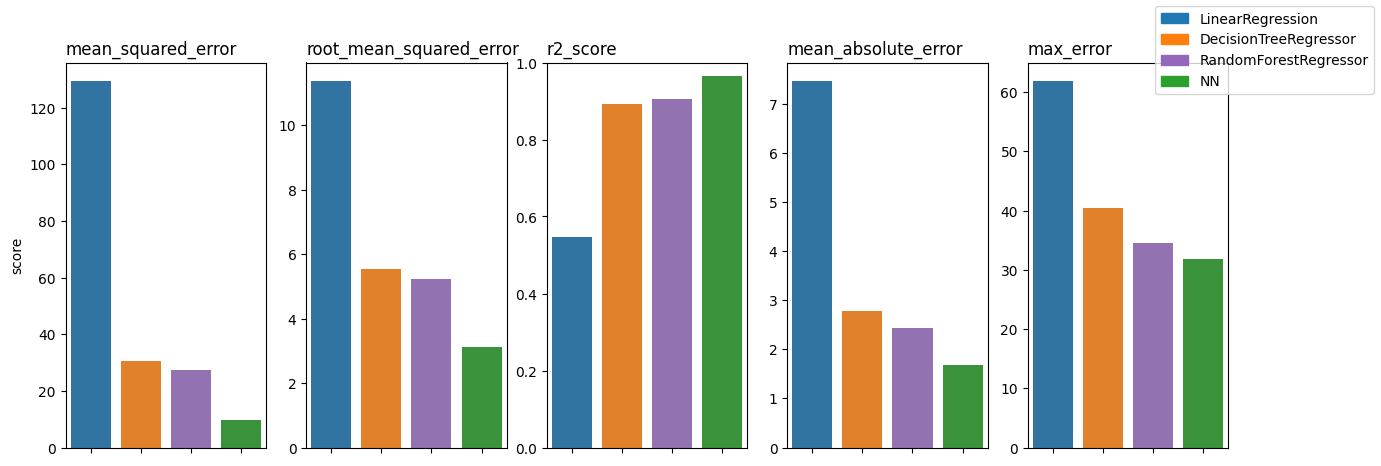

In [23]:
model_analysis.visualize_metrics(split='val',palette=ModelAnalysis.PALETTE, ncols=5, verbose=True, legend=True)
model_analysis.visualize_metrics(split='test',palette=ModelAnalysis.PALETTE, ncols=5, verbose=True, legend=True)

## We can save the models to a file to reuse them later without having to retrain them

In [22]:
# model_analysis.save_models()